# Packages

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import random
import cebra
from cebra import CEBRA
import cebra.grid_search
import time
import joblib as jl
from matplotlib.collections import LineCollection
import cebra.integrations.plotly
import os
import torch
%matplotlib inline

In [2]:
conf_dir = "/scratch/09117/xz6783/Xu/PL_miniscope/PL/Analysis/Cat_Odor_Conflict/Conflict/extracted_data/Calcium"
source_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/data"
output_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output"
model_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/visualization/models"
animal_id = '1S5'

# 1. Dataset

In [3]:
Dt = pd.read_csv(os.path.join(source_dir, f'{animal_id}.csv'), index_col= 0)
# Split
Y = Dt.iloc[:, 0:7]
X = Dt.iloc[:, 7:]
# View data
Dt

Timepoint         Time     Speed  Freezing  In Food Area  \
0             1     0.474524  0.012202       0.0           0.0   
1             2     1.506450  0.020988       0.0           0.0   
2             3     2.519550  0.023118       0.0           0.0   
3             4     3.532400  0.026644       0.0           0.0   
4             5     4.544150  0.067394       0.0           0.0   
...         ...          ...       ...       ...           ...   
1743       1744  1765.331750  0.032448       0.0           0.0   
1744       1745  1766.343900  0.014697       0.0           0.0   
1745       1746  1767.355200  0.011300       0.0           0.0   
1746       1747  1768.367500  0.010577       0.0           0.0   
1747       1748  1769.384000  0.012256       0.0           0.0   

      In Hidden Area  Bar Press active          0            1         2  ...  \
0                0.0               0.0   0.000000     0.000000  0.000000  ...   
1                0.0               0.0   0.000000     0.000000  0.000000  ...   
2                0.0               0.0   0.000000    66.862766  0.000000  ...   
3                0.2               0.0   0.000000   102.660082  0.000000  ...   
4                1.0               0.0   0.000000   258.266067  0.000000  ...   
...              ...               ...        ...          ...       ...  ...   
1743             1.0               0.0  42.892886  1117.313797  0.333471  ...   
1744             1.0               0.0  36.726124   981.156896  0.263456  ...   
1745             1.0               0.0  31.445965   935.058928  0.208140  ...   
1746             1.0               0.0  26.924941  1161.365393  0.164439  ...   
1747             1.0               0.0  17.833205   927.688360  0.101258  ...   

              48          49          50          51          52          53  \
0       0.000000    0.000000    0.000000   14.660896    0.000000    0.000000   
1       0.000000    2.101489    0.000000  284.915563    0.000000    0.000000   
2      23.314312   32.047737    0.000000  334.414389   19.144064    0.000000   
3      35.036496   46.068385    0.000000  390.558344   79.868490    0.000000   
4      29.079725   41.665093    0.000000  397.181631  108.106569    0.000000   
...          ...         ...         ...         ...         ...         ...   
1743  390.020631  140.953889   26.244867  306.656188   75.749042  120.909386   
1744  450.364581  127.481285   21.155179  314.743143  117.591740  214.906397   
1745  393.134478  115.296415   17.052538  289.492173  127.218403  309.419708   
1746  850.117359  104.276195   96.479995  248.659989  188.192875  284.457181   
1747  943.457625   72.569237  158.223654  165.168882  142.228949  188.673801   

              54          55          56          57  
0       0.000000    0.000000    0.000000    2.195283  
1       0.000000    0.000000    7.401216   56.121750  
2      45.837922    0.000000   46.414985   88.284996  
3      56.363705    0.000000   46.410979  107.353715  
4      51.718867    0.000000   39.859971  172.118431  
...          ...         ...         ...         ...  
1743  112.188606  256.582928  153.886081  320.877258  
1744   95.679260  229.354364  126.882376  278.606382  
1745  118.741933  205.015293  115.242590  352.875898  
1746  131.357706  183.259083  192.508172  564.460664  
1747  100.580547  126.193083  144.412477  379.896206  

[1748 rows x 65 columns]

In [4]:
X

0            1         2         3         4           5  \
0      0.000000     0.000000  0.000000  0.000000  0.000000    0.000000   
1      0.000000     0.000000  0.000000  0.000000  0.000000    1.729232   
2      0.000000    66.862766  0.000000  0.000000  0.000000   45.320357   
3      0.000000   102.660082  0.000000  0.000000  0.000000   59.873293   
4      0.000000   258.266067  0.000000  0.000000  0.000000  167.083798   
...         ...          ...       ...       ...       ...         ...   
1743  42.892886  1117.313797  0.333471  0.813239  2.928252  213.439871   
1744  36.726124   981.156896  0.263456  0.577531  2.324982  252.974193   
1745  31.445965   935.058928  0.208140  0.410140  1.845995  254.159741   
1746  26.924941  1161.365393  0.164439  0.291265  1.465689  298.797054   
1747  17.833205   927.688360  0.101258  0.162798  0.906621  213.541235   

               6           7         8           9  ...          48  \
0       0.000000    0.000000  0.000000    0.000000  ...    0.000000   
1       0.000000    0.000000  0.000000   48.272659  ...    0.000000   
2      65.709135    0.000000  0.000000   79.334954  ...   23.314312   
3      92.428942    0.000000  0.000000   63.560297  ...   35.036496   
4     209.947804    0.000000  0.000000   51.358900  ...   29.079725   
...          ...         ...       ...         ...  ...         ...   
1743  125.232202   94.373256  2.638667    6.203643  ...  390.020631   
1744  147.602701  131.174837  2.116774    5.747470  ...  450.364581   
1745  152.862083  135.727007  1.698104   79.942541  ...  393.134478   
1746  230.759835  125.890597  1.362241  140.368477  ...  850.117359   
1747  161.321481   86.445759  0.850549  109.064092  ...  943.457625   

              49          50          51          52          53          54  \
0       0.000000    0.000000   14.660896    0.000000    0.000000    0.000000   
1       2.101489    0.000000  284.915563    0.000000    0.000000    0.000000   
2      32.047737    0.000000  334.414389   19.144064    0.000000   45.837922   
3      46.068385    0.000000  390.558344   79.868490    0.000000   56.363705   
4      41.665093    0.000000  397.181631  108.106569    0.000000   51.718867   
...          ...         ...         ...         ...         ...         ...   
1743  140.953889   26.244867  306.656188   75.749042  120.909386  112.188606   
1744  127.481285   21.155179  314.743143  117.591740  214.906397   95.679260   
1745  115.296415   17.052538  289.492173  127.218403  309.419708  118.741933   
1746  104.276195   96.479995  248.659989  188.192875  284.457181  131.357706   
1747   72.569237  158.223654  165.168882  142.228949  188.673801  100.580547   

              55          56          57  
0       0.000000    0.000000    2.195283  
1       0.000000    7.401216   56.121750  
2       0.000000   46.414985   88.284996  
3       0.000000   46.410979  107.353715  
4       0.000000   39.859971  172.118431  
...          ...         ...         ...  
1743  256.582928  153.886081  320.877258  
1744  229.354364  126.882376  278.606382  
1745  205.015293  115.242590  352.875898  
1746  183.259083  192.508172  564.460664  
1747  126.193083  144.412477  379.896206  

[1748 rows x 58 columns]

# 2. Model setup

## (1). Train test split

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2024)

# Sort dataset by row index
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

## (2). Hyperparameter setup

distance = 'cosine'
time_offsets = 10
batch_size = None
learning_rate = 0.001
conditional = 'time_delta'
output_dimension = 3
num_hidden_units = 50
max_iterations = 10000
temperature = 1

# 3. Model building

## (1). [Freezing, In Hidden Area]

## Best Model Hyperparameters

In [6]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 1) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 1) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 1) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 1) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 1) {animal_id}.csv'), index_col=0)

In [7]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
12   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
12  time_delta                15                32            7500   

    Accuracy_Testing  
12          5.771385

In [8]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()


### These hyperparameters are used to build up models which only vary a parameter for temperature

In [10]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb1 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb1 = cebra_behavior_model_comb1.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb1 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb1 = cebra_behavior_model_00001_comb1.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb1 = cebra_behavior_model_01_comb1.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb1 = cebra_behavior_model_2_comb1.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb1 = cebra_behavior_model_3_comb1.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb1 = cebra_behavior_model_5_comb1.transform(X_train)

pos: -0.7154 neg:  7.4327 total:  6.7173 temperature:  1.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.24it/s]
pos: -996.6829 neg:  1001.7842 total:  5.1013 temperature:  0.0010: 100%|██████████| 10000/10000 [04:39<00:00, 35.72it/s]
pos: -7.3184 neg:  12.8930 total:  5.5745 temperature:  0.1000: 100%|██████████| 10000/10000 [04:29<00:00, 37.15it/s]
pos: -0.4139 neg:  7.3353 total:  6.9215 temperature:  2.0000: 100%|██████████| 10000/10000 [04:27<00:00, 37.40it/s]
pos: -0.2813 neg:  7.2960 total:  7.0147 temperature:  3.0000: 100%|██████████| 10000/10000 [04:26<00:00, 37.47it/s]
pos: -0.1642 neg:  7.2615 total:  7.0973 temperature:  5.0000: 100%|██████████| 10000/10000 [04:35<00:00, 36.36it/s]


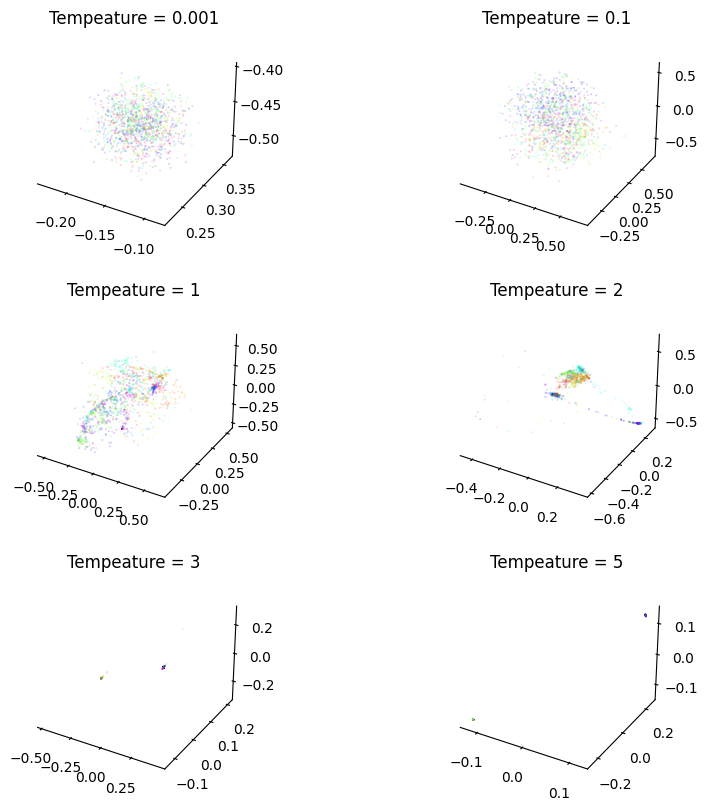

In [28]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [17]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb1 = cebra_time_model_025_comb1.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb1 = cebra_time_model_05_comb1.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb1 = cebra_time_model_075_comb1.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb1 = cebra_time_model_125_comb1.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb1 = cebra_time_model_15_comb1.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb1 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb1.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb1 = cebra_time_model_175_comb1.transform(X_train)

pos: -2.3711 neg:  8.4096 total:  6.0384 temperature:  0.2500: 100%|██████████| 10000/10000 [04:32<00:00, 36.73it/s]
pos: -1.2282 neg:  7.6316 total:  6.4034 temperature:  0.5000: 100%|██████████| 10000/10000 [04:30<00:00, 36.92it/s]
pos: -0.8762 neg:  7.4923 total:  6.6161 temperature:  0.7500: 100%|██████████| 10000/10000 [04:27<00:00, 37.33it/s]
pos: -0.5352 neg:  7.4001 total:  6.8649 temperature:  1.2500: 100%|██████████| 10000/10000 [04:23<00:00, 37.94it/s]
pos: -0.5244 neg:  7.3705 total:  6.8461 temperature:  1.5000: 100%|██████████| 10000/10000 [04:22<00:00, 38.10it/s]
pos: -0.4665 neg:  7.3538 total:  6.8873 temperature:  1.7500: 100%|██████████| 10000/10000 [04:27<00:00, 37.44it/s]


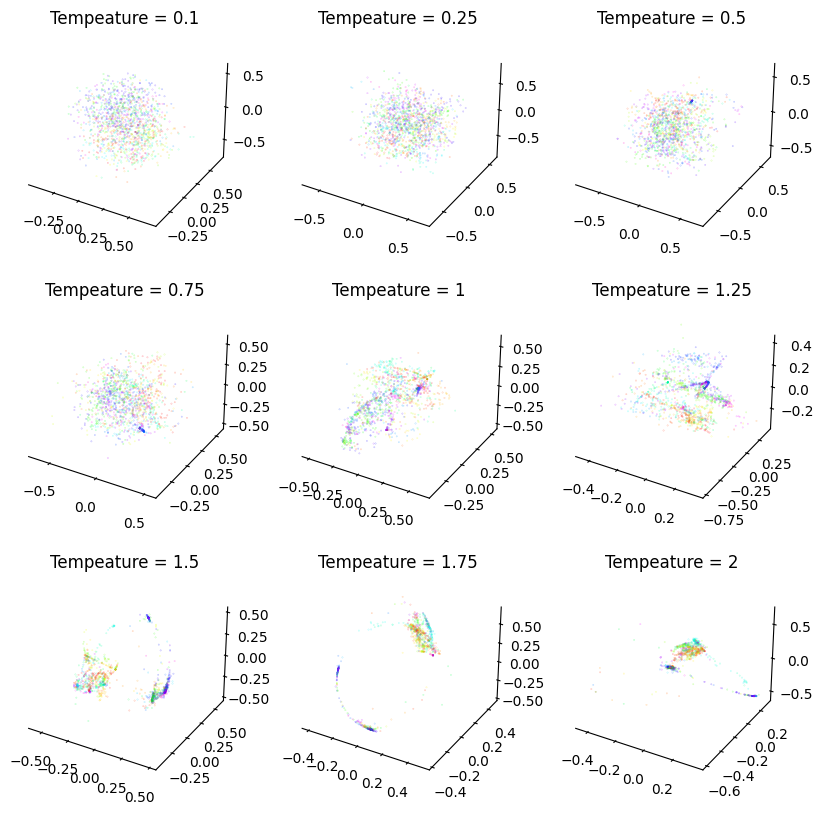

In [18]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb1,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [9]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model
cebra_behavior_model_comb1 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1.fit(X_train, y_train_comb)
cebra_behavior_model_comb1_embedding = cebra_behavior_model_comb1.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1 = cebra_behavior_model_comb1.state_dict_['loss']

pos: -0.3180 neg:  7.3199 total:  7.0019 temperature:  2.0000: 100%|██████████| 10000/10000 [04:13<00:00, 39.50it/s]


In [10]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [11]:
np.random.seed(999)
# Extract outcomes
y_train_comb = y_train.iloc[:, [3, 5]].to_numpy()

# Model_shuffled
cebra_behavior_model_comb1_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb1_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb1_embedding_shuffled = cebra_behavior_model_comb1_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss1_shuffled = cebra_behavior_model_comb1_shuffled.state_dict_['loss']

pos: -0.2551 neg:  7.3369 total:  7.0818 temperature:  2.0000: 100%|██████████| 10000/10000 [04:09<00:00, 40.12it/s]


In [12]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [13]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), cebra_behavior_model_comb1_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb1_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss1, os.path.join(model_dir,f"InfoNCELoss1 {animal_id}.pt"))
torch.save(InfoNCELoss1_shuffled, os.path.join(model_dir,f"InfoNCELoss1_shuffled {animal_id}.pt"))
cebra_behavior_model_comb1.save(os.path.join(model_dir,f"cebra_behavior_model_comb1 {animal_id}.pt"))
cebra_behavior_model_comb1_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb1_shuffled {animal_id}.pt"))

## (2). [In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [14]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 2) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 2) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 2) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 2) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 2) {animal_id}.csv'), index_col=0)

In [15]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
12   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
12  time_delta                15                32            7500   

    Accuracy_Testing  
12          5.856631

In [16]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [17]:
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

In [33]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb2 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb2 = cebra_behavior_model_comb2.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb2 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb2 = cebra_behavior_model_00001_comb2.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb2 = cebra_behavior_model_01_comb2.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb2 = cebra_behavior_model_2_comb2.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb2 = cebra_behavior_model_3_comb2.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb2 = cebra_behavior_model_5_comb2.transform(X_train)

pos: -0.5185 neg:  7.4168 total:  6.8983 temperature:  1.0000: 100%|██████████| 10000/10000 [04:16<00:00, 39.04it/s]
pos: -996.5504 neg:  1001.9191 total:  5.3688 temperature:  0.0010: 100%|██████████| 10000/10000 [04:20<00:00, 38.33it/s]
pos: -7.3213 neg:  13.1501 total:  5.8288 temperature:  0.1000: 100%|██████████| 10000/10000 [04:23<00:00, 37.97it/s]
pos: -0.2712 neg:  7.3164 total:  7.0451 temperature:  2.0000: 100%|██████████| 10000/10000 [04:21<00:00, 38.27it/s]
pos: -0.1951 neg:  7.2904 total:  7.0953 temperature:  3.0000: 100%|██████████| 10000/10000 [04:23<00:00, 37.97it/s]
pos: -0.1153 neg:  7.2696 total:  7.1543 temperature:  5.0000: 100%|██████████| 10000/10000 [04:23<00:00, 37.96it/s]


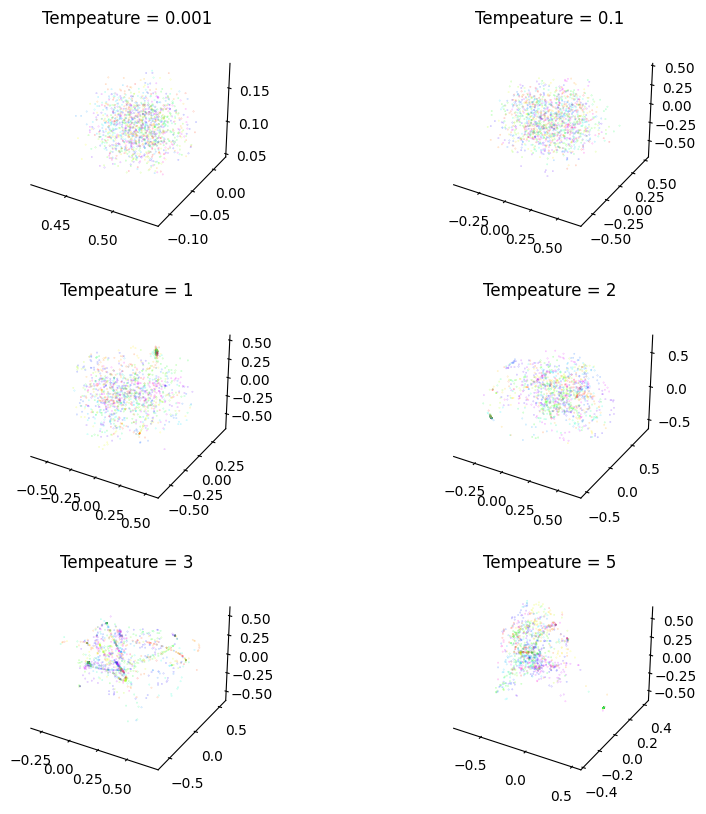

In [34]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [35]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb2 = cebra_time_model_025_comb2.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb2 = cebra_time_model_05_comb2.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb2 = cebra_time_model_075_comb2.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb2 = cebra_time_model_125_comb2.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb2 = cebra_time_model_15_comb2.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb2 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb2.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb2 = cebra_time_model_175_comb2.transform(X_train)

pos: -2.3612 neg:  8.6753 total:  6.3140 temperature:  0.2500: 100%|██████████| 10000/10000 [04:20<00:00, 38.34it/s]
pos: -1.0893 neg:  7.7384 total:  6.6492 temperature:  0.5000: 100%|██████████| 10000/10000 [04:26<00:00, 37.57it/s]
pos: -0.6928 neg:  7.5090 total:  6.8162 temperature:  0.7500: 100%|██████████| 10000/10000 [04:24<00:00, 37.86it/s]
pos: -0.4353 neg:  7.3694 total:  6.9341 temperature:  1.2500: 100%|██████████| 10000/10000 [04:20<00:00, 38.45it/s]
pos: -0.3543 neg:  7.3470 total:  6.9927 temperature:  1.5000: 100%|██████████| 10000/10000 [04:20<00:00, 38.42it/s]
pos: -0.3070 neg:  7.3276 total:  7.0207 temperature:  1.7500: 100%|██████████| 10000/10000 [04:18<00:00, 38.75it/s]


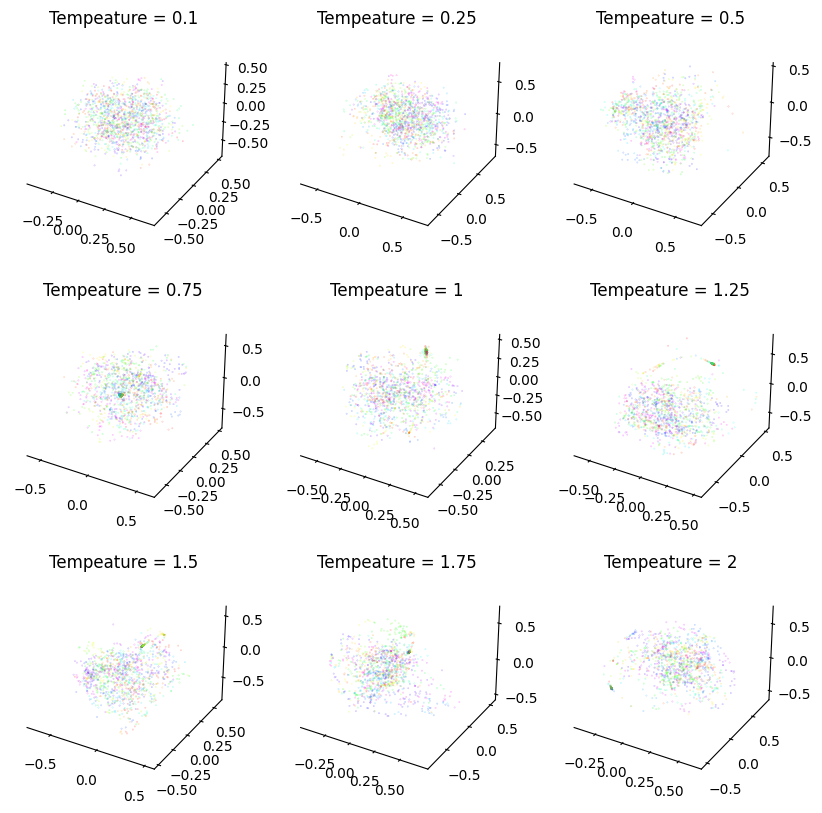

In [36]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb2,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [18]:
# Extract outcomes
y_train_comb = y_train.iloc[:, [4, 6]].to_numpy()

# Model
cebra_behavior_model_comb2 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2.fit(X_train, y_train_comb)
cebra_behavior_model_comb2_embedding = cebra_behavior_model_comb2.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2 = cebra_behavior_model_comb2.state_dict_['loss']

pos: -0.3153 neg:  7.3203 total:  7.0050 temperature:  2.0000: 100%|██████████| 10000/10000 [04:02<00:00, 41.18it/s]


In [19]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [20]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb2_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb2_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb2_embedding_shuffled = cebra_behavior_model_comb2_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss2_shuffled = cebra_behavior_model_comb2_shuffled.state_dict_['loss']

pos: -0.2460 neg:  7.3317 total:  7.0857 temperature:  2.0000: 100%|██████████| 10000/10000 [04:08<00:00, 40.20it/s]


In [21]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [22]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), cebra_behavior_model_comb2_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb2_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss2, os.path.join(model_dir,f"InfoNCELoss2 {animal_id}.pt"))
torch.save(InfoNCELoss2_shuffled, os.path.join(model_dir,f"InfoNCELoss2_shuffled {animal_id}.pt"))
cebra_behavior_model_comb2.save(os.path.join(model_dir,f"cebra_behavior_model_comb2 {animal_id}.pt"))
cebra_behavior_model_comb2_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb2_shuffled {animal_id}.pt"))

## (3). [Freezing, In Hidden Area, In Food Area, Bar Press Active]

## Best Model Hyperparameters

In [23]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 3) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 3) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 3) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 3) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 3) {animal_id}.csv'), index_col=0)

In [24]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
13   cosine             auto            10         NaN          0.001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
13  time_delta                15                50            7500   

    Accuracy_Testing  
13          5.621578

In [25]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1

In [26]:
y_train_comb = y_train.iloc[:, [3,4,5,6]].to_numpy()

In [ ]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb3 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb3 = cebra_behavior_model_comb3.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb3 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb3 = cebra_behavior_model_00001_comb3.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb3 = cebra_behavior_model_01_comb3.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb3 = cebra_behavior_model_2_comb3.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb3 = cebra_behavior_model_3_comb3.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb3 = cebra_behavior_model_5_comb3.transform(X_train)

pos: -0.7438 neg:  7.4323 total:  6.6885 temperature:  1.0000: 100%|██████████| 10000/10000 [04:20<00:00, 38.33it/s]
pos: -997.6565 neg:  1003.2562 total:  5.5996 temperature:  0.0010: 100%|██████████| 10000/10000 [04:15<00:00, 39.09it/s]
pos: -7.4462 neg:  12.9354 total:  5.4892 temperature:  0.1000: 100%|██████████| 10000/10000 [04:17<00:00, 38.85it/s]
pos: -0.4010 neg:  7.3194 total:  6.9184 temperature:  2.0000: 100%|██████████| 10000/10000 [04:20<00:00, 38.42it/s]
pos: -0.2736 neg:  7.2842 total:  7.0106 temperature:  3.0000: 100%|██████████| 10000/10000 [04:19<00:00, 38.60it/s]
pos: -0.1659 neg:  7.2613 total:  7.0953 temperature:  5.0000:  61%|██████    | 6074/10000 [02:38<01:40, 38.99it/s]

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [47]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb3 = cebra_time_model_025_comb3.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb3 = cebra_time_model_05_comb3.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb3 = cebra_time_model_075_comb3.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb3 = cebra_time_model_125_comb3.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb3 = cebra_time_model_15_comb3.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb3 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb3.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb3 = cebra_time_model_175_comb3.transform(X_train)

pos: -2.3676 neg:  8.3054 total:  5.9378 temperature:  0.2500:  30%|███       | 3004/10000 [01:19<03:02, 38.24it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pos: -1.2840 neg:  7.6397 total:  6.3557 temperature:  0.5000:  28%|██▊       | 2823/10000 [01:13<03:12, 37.32it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pos: -0.9330 neg:  7.4960 total:  6.5629 temperature:  0.7500:  32%|███▏      | 3237/10000 [01:24<02:52, 39.16it/s]IOPub

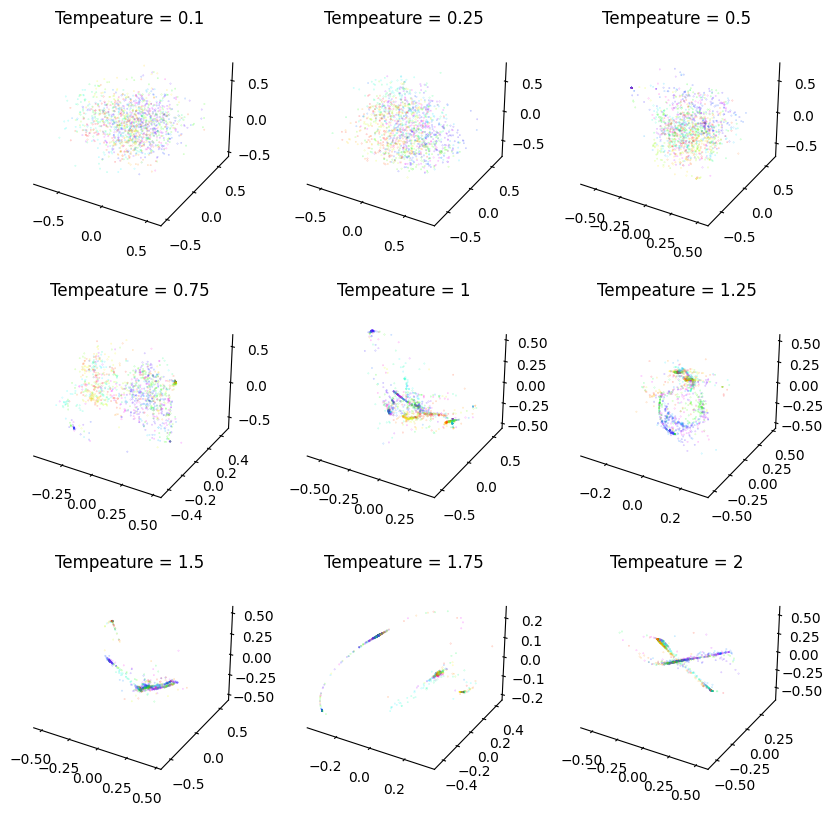

In [48]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb3,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [27]:
# Model
cebra_behavior_model_comb3 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3.fit(X_train, y_train_comb)
cebra_behavior_model_comb3_embedding = cebra_behavior_model_comb3.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3 = cebra_behavior_model_comb3.state_dict_['loss']

pos: -0.3454 neg:  7.3164 total:  6.9711 temperature:  2.0000: 100%|██████████| 10000/10000 [04:16<00:00, 39.06it/s]


In [28]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [29]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb3_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb3_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb3_embedding_shuffled = cebra_behavior_model_comb3_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss3_shuffled = cebra_behavior_model_comb3_shuffled.state_dict_['loss']

pos: -0.2445 neg:  7.3178 total:  7.0733 temperature:  2.0000: 100%|██████████| 10000/10000 [04:19<00:00, 38.56it/s]


In [30]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Freezing, In Hidden Area, In Food Area, Bar Press Active] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [31]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), cebra_behavior_model_comb3_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb3_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss3, os.path.join(model_dir,f"InfoNCELoss3 {animal_id}.pt"))
torch.save(InfoNCELoss3_shuffled, os.path.join(model_dir,f"InfoNCELoss3_shuffled {animal_id}.pt"))
cebra_behavior_model_comb3.save(os.path.join(model_dir,f"cebra_behavior_model_comb3 {animal_id}.pt"))
cebra_behavior_model_comb3_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb3_shuffled {animal_id}.pt"))

## (4). [Speed]

## Best Model Hyperparameters

In [32]:
res0 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 0 (Comb 4) {animal_id}.csv'), index_col=0)
res1 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 1 (Comb 4) {animal_id}.csv'), index_col=0)
res2 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 2 (Comb 4) {animal_id}.csv'), index_col=0)
res3 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 3 (Comb 4) {animal_id}.csv'), index_col=0)
res4 = pd.read_csv(os.path.join(output_dir, f'CEBRA_Behavior Training Results 4 (Comb 4) {animal_id}.csv'), index_col=0)

In [33]:
# Training result
modelPerformence = pd.concat([res0, res1, res2, res3, res4])

# Extract min value of convergence
Logic = modelPerformence.loc[:, 'Accuracy_Testing'] == min(modelPerformence.loc[:, 'Accuracy_Testing'])
bestModelPara = modelPerformence[Logic]
bestModelPara

distance temperature_mode  time_offsets  batch_size  learning_rate  \
14   cosine             auto            10         NaN         0.0001   

   conditional  output_dimension  num_hidden_units  max_iterations  \
14  time_delta                15                75            7500   

    Accuracy_Testing  
14          6.957727

In [34]:
batch_size = bestModelPara.batch_size.values[0]
learning_rate = bestModelPara.learning_rate.values[0]
output_dimension = bestModelPara.output_dimension.values[0]
max_iterations = 10000
distance = bestModelPara.distance.values[0]
conditional = bestModelPara.conditional.values[0]
num_hidden_units = bestModelPara.num_hidden_units.values[0]
time_offsets = bestModelPara.time_offsets.values[0]
temperature = 1
y_train_comb = y_train.iloc[:, [2]].to_numpy()

In [56]:
# Temperature = 1 (default) ##################################################################################
cebra_behavior_model_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_comb4 .fit(X_train, y_train_comb)
# Extract embedding vector
embedding_comb4 = cebra_behavior_model_comb4.transform(X_train)

# Temperature = 0.001 #########################################################################################
cebra_behavior_model_00001_comb4 =CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.001,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_00001_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_00001_comb4 = cebra_behavior_model_00001_comb4.transform(X_train)

# Temperature = 0.1 #############################################################################################
cebra_behavior_model_01_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.1,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_01_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_01_comb4 = cebra_behavior_model_01_comb4.transform(X_train)

# Temperature = 2 ################################################################################################
cebra_behavior_model_2_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_2_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_2_comb4 = cebra_behavior_model_2_comb4.transform(X_train)

# Temperature = 3 ################################################################################################
cebra_behavior_model_3_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 3,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)
# Model fitting
cebra_behavior_model_3_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_3_comb4 = cebra_behavior_model_3_comb4.transform(X_train)

# Temperature = 5 ################################################################################################
cebra_behavior_model_5_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_behavior_model_5_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_5_comb4 = cebra_behavior_model_5_comb4.transform(X_train)

pos: -0.4702 neg:  7.4835 total:  7.0133 temperature:  1.0000: 100%|██████████| 10000/10000 [04:34<00:00, 36.37it/s]
pos: -998.0182 neg:  1004.7532 total:  6.7349 temperature:  0.0010: 100%|██████████| 10000/10000 [04:32<00:00, 36.76it/s]
pos: -7.9606 neg:  14.7202 total:  6.7596 temperature:  0.1000: 100%|██████████| 10000/10000 [04:44<00:00, 35.09it/s]
pos: -0.2310 neg:  7.3371 total:  7.1061 temperature:  2.0000: 100%|██████████| 10000/10000 [04:11<00:00, 39.73it/s]
pos: -0.1567 neg:  7.2929 total:  7.1363 temperature:  3.0000: 100%|██████████| 10000/10000 [04:15<00:00, 39.11it/s]
pos: -0.0844 neg:  7.2623 total:  7.1780 temperature:  5.0000: 100%|██████████| 10000/10000 [04:19<00:00, 38.49it/s]


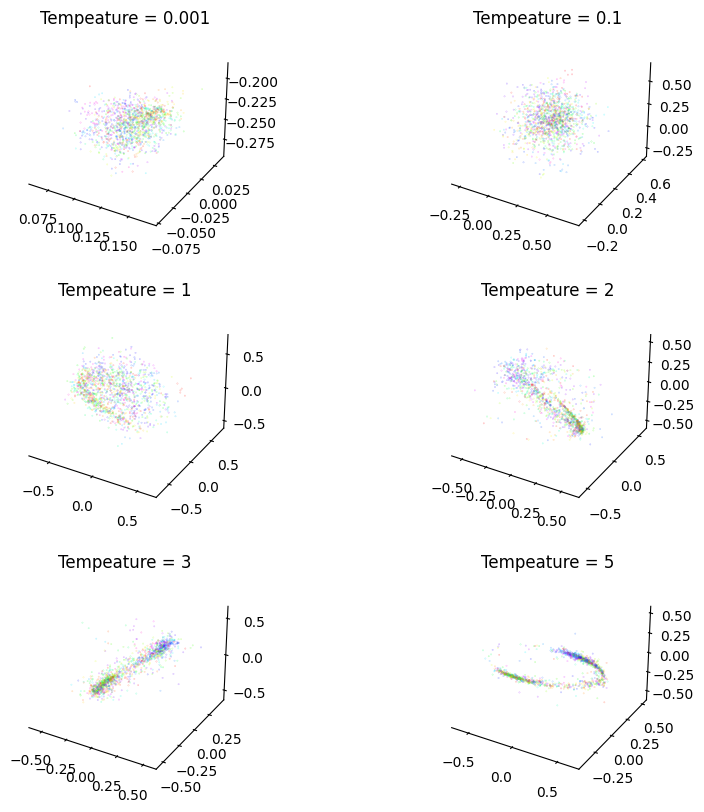

In [57]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(321, projection = '3d')

# Visualized embedding
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_00001_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.001",
                                                           cmap = "gist_rainbow")
ax2 = plt.subplot(322, projection = '3d')

ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax3 = plt.subplot(323, projection = '3d')
ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax4 = plt.subplot(324, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(325, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_3_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 3",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(326, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_5_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 5",
                                                           cmap = "gist_rainbow")

fig.show()

In [58]:
# Temperature = 0.25 #######################################################################################
cebra_time_model_025_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_025_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_025_comb4 = cebra_time_model_025_comb4.transform(X_train)

# Temperature = 0.5 #########################################################################################
cebra_time_model_05_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_05_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_05_comb4 = cebra_time_model_05_comb4.transform(X_train)

# Temperature = 0.75 #############################################################################################
cebra_time_model_075_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 0.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_075_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_075_comb4 = cebra_time_model_075_comb4.transform(X_train)

# Temperature = 1.25 ##############################################################################################
cebra_time_model_125_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.25,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_125_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_125_comb4 = cebra_time_model_125_comb4.transform(X_train)

# Temperature = 1.5 ################################################################################################
cebra_time_model_15_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.5,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_15_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_15_comb4 = cebra_time_model_15_comb4.transform(X_train)

# Temperature = 1.75 ################################################################################################
cebra_time_model_175_comb4 = CEBRA(
                                   learning_rate = learning_rate,
                                   temperature = 1.75,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Model fitting
cebra_time_model_175_comb4.fit(X_train, y_train_comb)
# Extract embedding vector
embedding_175_comb4 = cebra_time_model_175_comb4.transform(X_train)

pos: -2.4412 neg:  9.2664 total:  6.8252 temperature:  0.2500: 100%|██████████| 10000/10000 [04:21<00:00, 38.20it/s]
pos: -1.0342 neg:  7.9423 total:  6.9082 temperature:  0.5000: 100%|██████████| 10000/10000 [04:17<00:00, 38.78it/s]
pos: -0.6922 neg:  7.6590 total:  6.9668 temperature:  0.7500: 100%|██████████| 10000/10000 [04:15<00:00, 39.16it/s]
pos: -0.3695 neg:  7.4176 total:  7.0481 temperature:  1.2500: 100%|██████████| 10000/10000 [04:16<00:00, 38.99it/s]
pos: -0.3198 neg:  7.3728 total:  7.0530 temperature:  1.5000: 100%|██████████| 10000/10000 [04:25<00:00, 37.73it/s]
pos: -0.2597 neg:  7.3524 total:  7.0928 temperature:  1.7500: 100%|██████████| 10000/10000 [04:25<00:00, 37.63it/s]


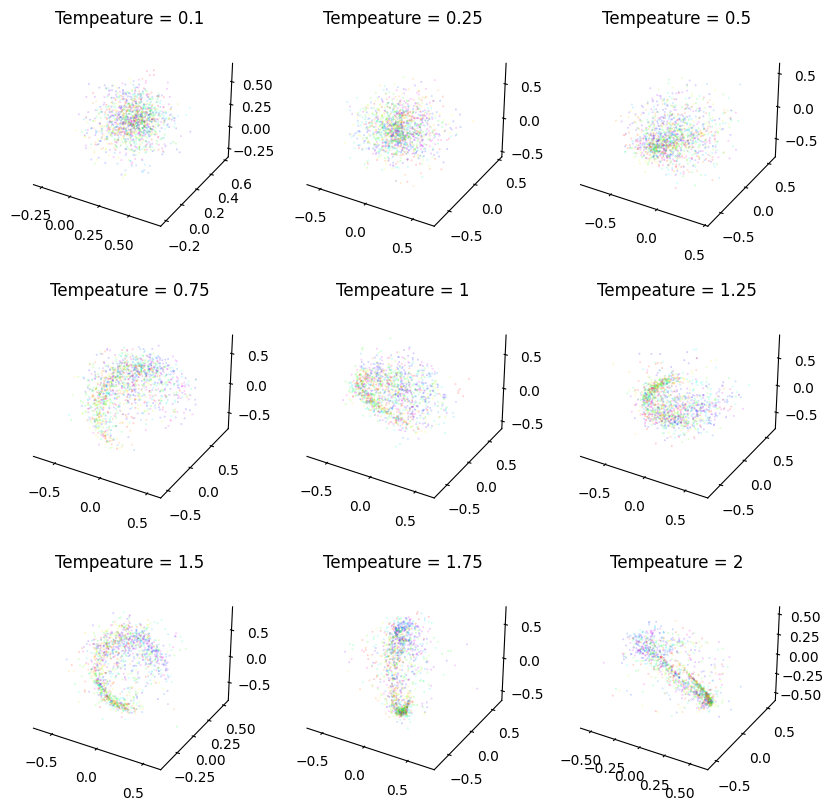

In [59]:
fig = plt.figure(figsize = (10, 10))

ax1 = plt.subplot(331, projection = '3d')
ax1 = cebra.plot_embedding(ax=ax1, embedding=embedding_01_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.1",
                                                           cmap = "gist_rainbow")

ax2 = plt.subplot(332, projection = '3d')
ax2 = cebra.plot_embedding(ax=ax2, embedding=embedding_025_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.25",
                                                           cmap = "gist_rainbow")
ax3 = plt.subplot(333, projection = '3d')

ax3 = cebra.plot_embedding(ax=ax3, embedding=embedding_05_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.5",
                                                           cmap = "gist_rainbow")

ax4 = plt.subplot(334, projection = '3d')
ax4 = cebra.plot_embedding(ax=ax4, embedding=embedding_075_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 0.75",
                                                           cmap = "gist_rainbow")
ax5 = plt.subplot(335, projection = '3d')
ax5 = cebra.plot_embedding(ax=ax5, embedding=embedding_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1",
                                                           cmap = "gist_rainbow")
ax6 = plt.subplot(336, projection = '3d')
ax6 = cebra.plot_embedding(ax=ax6, embedding=embedding_125_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.25",
                                                           cmap = "gist_rainbow")
ax7 = plt.subplot(337, projection = '3d')
ax7 = cebra.plot_embedding(ax=ax7, embedding=embedding_15_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.5",
                                                           cmap = "gist_rainbow")
ax8 = plt.subplot(338, projection = '3d')
ax8 = cebra.plot_embedding(ax=ax8, embedding=embedding_175_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 1.75",
                                                           cmap = "gist_rainbow")
ax9 = plt.subplot(339, projection = '3d')
ax9 = cebra.plot_embedding(ax=ax9, embedding=embedding_2_comb4,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Tempeature = 2",
                                                           cmap = "gist_rainbow")

fig.show()

In [35]:
# Model
cebra_behavior_model_comb4 = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4.fit(X_train, y_train_comb)
cebra_behavior_model_comb4_embedding = cebra_behavior_model_comb4.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4 = cebra_behavior_model_comb4.state_dict_['loss']

pos: -0.2333 neg:  7.3302 total:  7.0969 temperature:  2.0000: 100%|██████████| 10000/10000 [04:23<00:00, 37.93it/s]


In [36]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed]",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [37]:
np.random.seed(999)
# Extract outcomes

# Model_shuffled
cebra_behavior_model_comb4_shuffled = CEBRA(learning_rate = learning_rate,
                                   temperature = 2,
                                   output_dimension = output_dimension,
                                   max_iterations = max_iterations,
                                   distance = distance,
                                   conditional = conditional,
                                   num_hidden_units = num_hidden_units,
                                   device = 'cuda_if_available',
                                   verbose = True,
                                   time_offsets = time_offsets)

# Fit and get embedding
cebra_behavior_model_comb4_shuffled.fit(X_train, np.random.permutation(y_train_comb))
cebra_behavior_model_comb4_embedding_shuffled = cebra_behavior_model_comb4_shuffled.transform(X_train)

# Obtain InfoNCE loss
InfoNCELoss4_shuffled = cebra_behavior_model_comb4_shuffled.state_dict_['loss']

pos: -0.2051 neg:  7.3300 total:  7.1250 temperature:  2.0000: 100%|██████████| 10000/10000 [04:23<00:00, 37.90it/s]


In [38]:
# Visualized embedding
fig = cebra.integrations.plotly.plot_embedding_interactive(cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "[Speed] shuffled",
                                                           cmap = "gist_rainbow")
fig.show()

<Figure size 500x500 with 0 Axes>

In [39]:
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), cebra_behavior_model_comb4_embedding, delimiter=",")
np.savetxt(os.path.join(model_dir,f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), cebra_behavior_model_comb4_embedding_shuffled, delimiter=",")
torch.save(InfoNCELoss4, os.path.join(model_dir,f"InfoNCELoss4 {animal_id}.pt"))
torch.save(InfoNCELoss4_shuffled, os.path.join(model_dir,f"InfoNCELoss4_shuffled {animal_id}.pt"))
cebra_behavior_model_comb4.save(os.path.join(model_dir,f"cebra_behavior_model_comb4 {animal_id}.pt"))
cebra_behavior_model_comb4_shuffled.save(os.path.join(model_dir,f"cebra_behavior_model_comb4_shuffled {animal_id}.pt"))

# 4. Model evaluation

In [40]:
InfoNCELoss1 = torch.load(os.path.join(model_dir, f"InfoNCELoss1 {animal_id}.pt"))
InfoNCELoss1_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss1_shuffled {animal_id}.pt"))
InfoNCELoss2 = torch.load(os.path.join(model_dir, f"InfoNCELoss2 {animal_id}.pt"))
InfoNCELoss2_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss2_shuffled {animal_id}.pt"))
InfoNCELoss3 = torch.load(os.path.join(model_dir, f"InfoNCELoss3 {animal_id}.pt"))
InfoNCELoss3_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss3_shuffled {animal_id}.pt"))
InfoNCELoss4 = torch.load(os.path.join(model_dir, f"InfoNCELoss4 {animal_id}.pt"))
InfoNCELoss4_shuffled = torch.load(os.path.join(model_dir, f"InfoNCELoss4_shuffled {animal_id}.pt"))

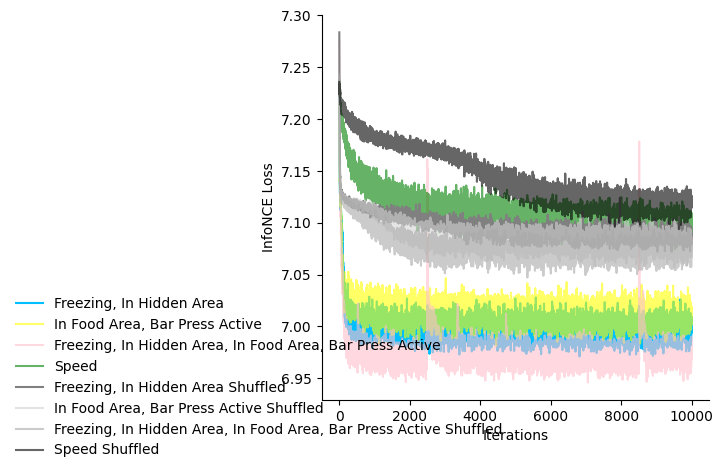

In [41]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(InfoNCELoss1, c='deepskyblue', label = 'Freezing, In Hidden Area')
ax.plot(InfoNCELoss2, c='yellow', alpha = 0.6, label = 'In Food Area, Bar Press Active')
ax.plot(InfoNCELoss3, c='pink', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active')
ax.plot(InfoNCELoss4, c='green', alpha=0.6,label = 'Speed')
ax.plot(InfoNCELoss1_shuffled, c='gray', label = 'Freezing, In Hidden Area Shuffled')
ax.plot(InfoNCELoss2_shuffled, c='lightgray', alpha = 0.6, label = 'In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss3_shuffled, c='darkgray', alpha=0.6,label = 'Freezing, In Hidden Area, In Food Area, Bar Press Active Shuffled')
ax.plot(InfoNCELoss4_shuffled, c='black', alpha=0.6,label = 'Speed Shuffled')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations')
ax.set_ylabel('InfoNCE Loss')
plt.legend(bbox_to_anchor=(0.5,0.3), frameon = False )
plt.show()

In [42]:
cebra_behavior_model_comb1_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb1_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb1_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb2_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb2_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb3_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb3_embedding_shuffled {animal_id}.csv"), delimiter = ',')
cebra_behavior_model_comb4_embedding_shuffled = np.loadtxt(os.path.join(model_dir, f"cebra_behavior_model_comb4_embedding_shuffled {animal_id}.csv"), delimiter = ',')


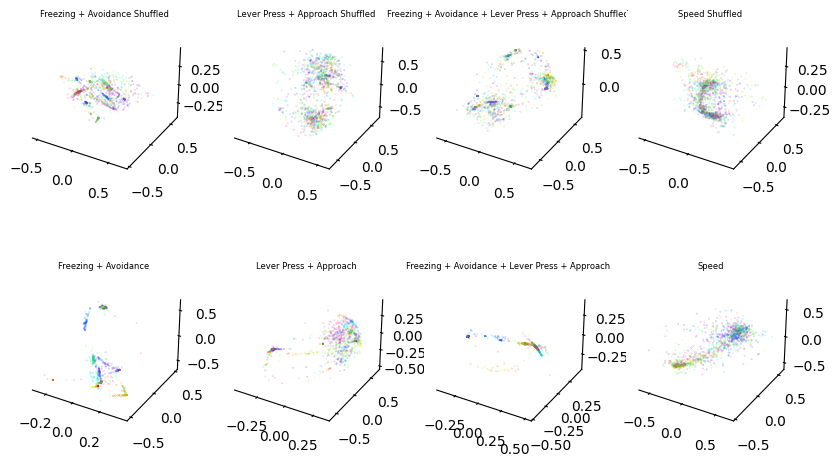

In [43]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "gist_rainbow")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "gist_rainbow")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "gist_rainbow")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "gist_rainbow")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "gist_rainbow")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "gist_rainbow")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "gist_rainbow")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)

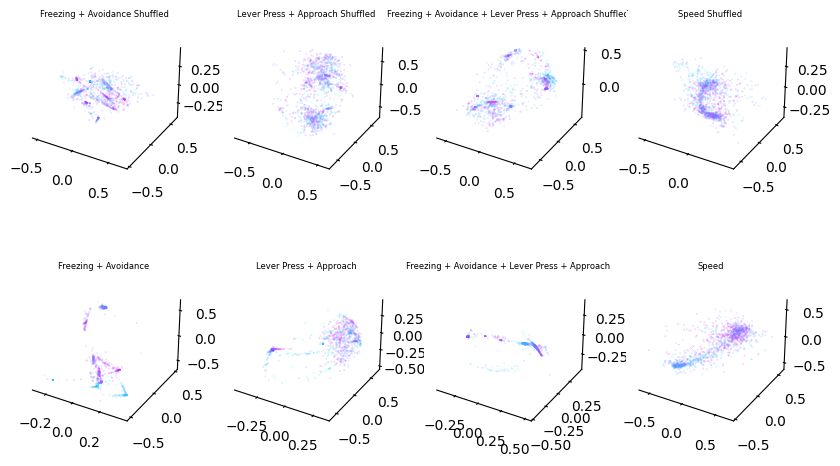

In [44]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(241, projection = '3d')
ax2=plt.subplot(242, projection = '3d')
ax3=plt.subplot(243, projection = '3d')
ax4=plt.subplot(244, projection = '3d')
ax5=plt.subplot(245, projection = '3d')
ax6=plt.subplot(246, projection = '3d')
ax7=plt.subplot(247, projection = '3d')
ax8=plt.subplot(248, projection = '3d')

ax1 = cebra.plot_embedding(ax=ax1, embedding=cebra_behavior_model_comb1_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance Shuffled",
                                                           cmap = "cool")

ax2 = cebra.plot_embedding(ax=ax2, embedding=cebra_behavior_model_comb2_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax3 = cebra.plot_embedding(ax=ax3, embedding=cebra_behavior_model_comb3_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach Shuffled",
                                                           cmap = "cool")

ax4 = cebra.plot_embedding(ax=ax4, embedding=cebra_behavior_model_comb4_embedding_shuffled,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed Shuffled",
                                                           cmap = "cool")

ax5 = cebra.plot_embedding(ax=ax5, embedding=cebra_behavior_model_comb1_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance",
                                                           cmap = "cool")

ax6 = cebra.plot_embedding(ax=ax6, embedding=cebra_behavior_model_comb2_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Lever Press + Approach",
                                                           cmap = "cool")

ax7 = cebra.plot_embedding(ax=ax7, embedding=cebra_behavior_model_comb3_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Freezing + Avoidance + Lever Press + Approach",
                                                           cmap = "cool")
ax8 = cebra.plot_embedding(ax=ax8, embedding=cebra_behavior_model_comb4_embedding,
                                                           embedding_labels = y_train.iloc[:, 1],
                                                           title = "Speed",
                                                           cmap = "cool")

ax1.title.set_size(6)
ax2.title.set_size(6)
ax3.title.set_size(6)
ax4.title.set_size(6)
ax5.title.set_size(6)
ax6.title.set_size(6)
ax7.title.set_size(6)
ax8.title.set_size(6)

In [45]:
y_train

Timepoint         Time     Speed  Freezing  In Food Area  \
0             1     0.474524  0.012202       0.0           0.0   
3             4     3.532400  0.026644       0.0           0.0   
6             7     6.568700  0.027363       0.0           0.0   
7             8     7.581450  0.035983       0.0           0.0   
8             9     8.591600  0.018264       0.0           0.0   
...         ...          ...       ...       ...           ...   
1741       1742  1763.307050  0.042815       0.0           0.0   
1742       1743  1764.318950  0.031946       0.0           0.0   
1743       1744  1765.331750  0.032448       0.0           0.0   
1745       1746  1767.355200  0.011300       0.0           0.0   
1747       1748  1769.384000  0.012256       0.0           0.0   

      In Hidden Area  Bar Press active  
0                0.0               0.0  
3                0.2               0.0  
6                1.0               0.0  
7                1.0               0.0  
8                1.0               0.0  
...              ...               ...  
1741             1.0               0.0  
1742             1.0               0.0  
1743             1.0               0.0  
1745             1.0               0.0  
1747             1.0               0.0  

[1398 rows x 7 columns]

In [66]:
y_train_comb1 = y_train.iloc[:, 1].to_numpy()
y_train_labels = [y_train_comb1, y_train_comb1, y_train_comb1, y_train_comb1]
embeddings = [cebra_behavior_model_comb1_embedding, cebra_behavior_model_comb2_embedding,
              cebra_behavior_model_comb3_embedding, cebra_behavior_model_comb4_embedding]
names = ["Comb1", "Comb2", "Comb3", "Comb4"]


<AxesSubplot:title={'center':'CEBRA-Behavior'}>

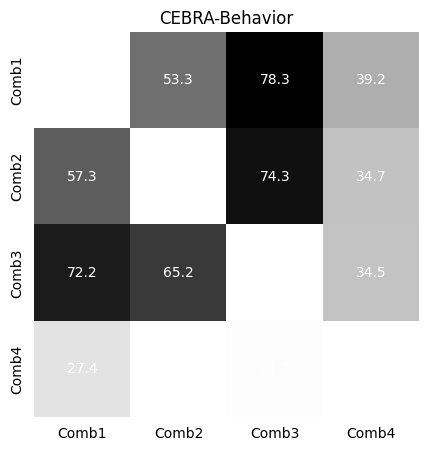

In [67]:
scores, pairs, subjects = cebra.sklearn.metrics.consistency_score(embeddings=list(embeddings),
                                                                                 labels=y_train_labels,
                                                                                 dataset_ids=names,
                                                                                 between="datasets")
cebra.plot_consistency(scores, pairs=pairs, datasets=subjects,
                             title="CEBRA-Behavior", colorbar_label=None)

# Decoding